In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve

In [0]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [0]:
df = pd.read_csv('heart.csv')

In [0]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df.shape

(303, 14)

In [0]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

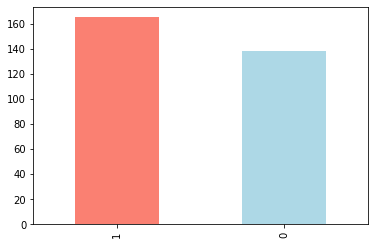

In [0]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [0]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [0]:
##Heart Disease Frequency according to sex

In [0]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [0]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


Text(0.5, 1.0, 'Heart Disease Frequency by sex')

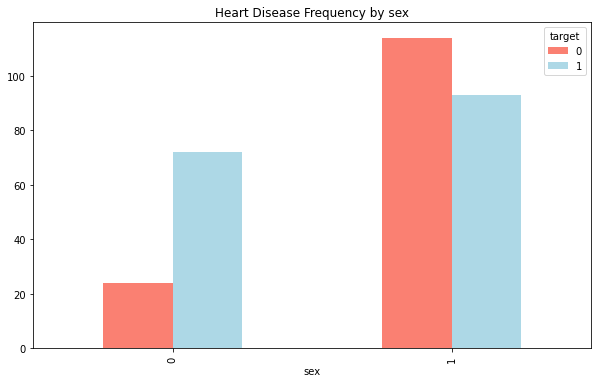

In [0]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar',
                                          figsize=(10,6),
                                          color = ['salmon', 'lightblue'])

plt.title('Heart Disease Frequency by sex')


Age vs Max Heart Rate for Heart Disease

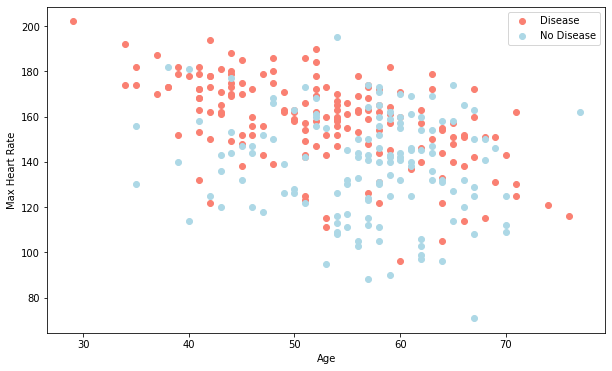

In [0]:
plt.figure(figsize=(10,6))

plt.scatter(df['age'][df.target==1],
            df.thalach[df.target==1],
            c='salmon')

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

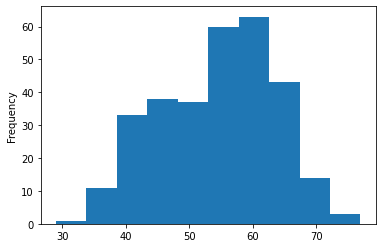

In [0]:
df['age'].plot.hist()

# Heart Disease Freq per Chest Pain Type

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [0]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


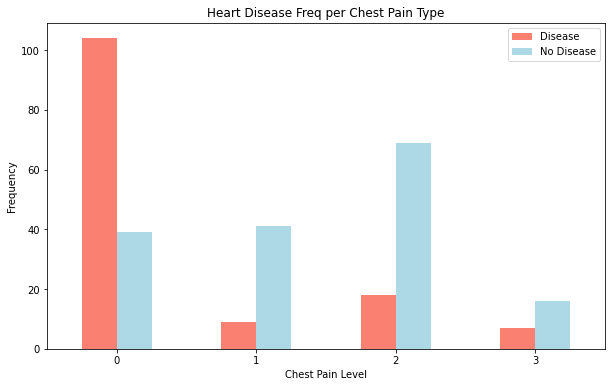

In [0]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar',
                                         figsize=(10,6),
                                         color=['salmon', 'lightblue'])

plt.title('Heart Disease Freq per Chest Pain Type')
plt.xlabel('Chest Pain Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['Disease', 'No Disease']);

In [0]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


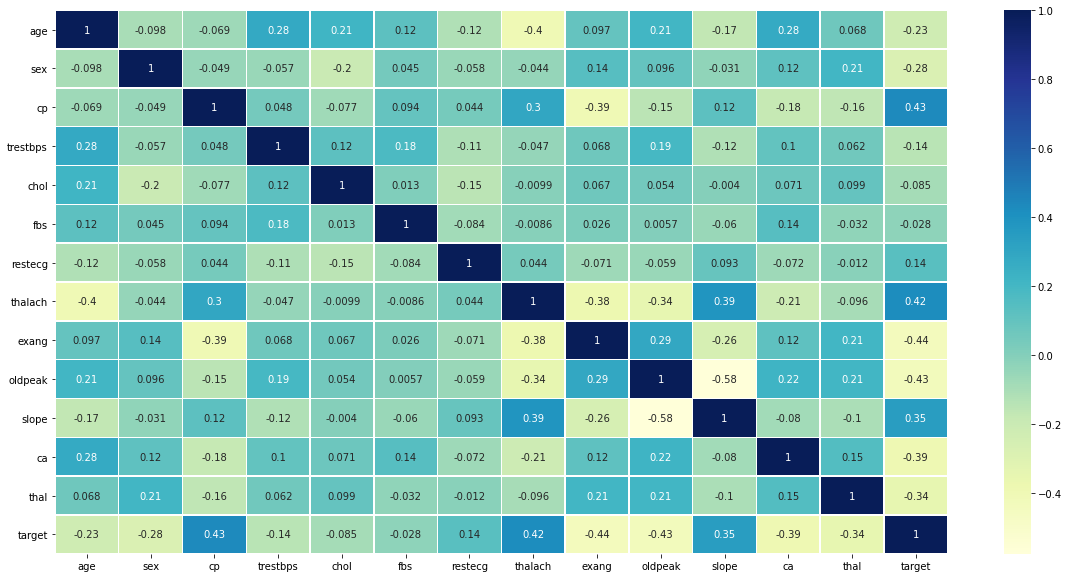

In [0]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 cmap='YlGnBu')

ax.

# Modelling

In [0]:
X = df.drop('target', axis=1)
y= df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'KNeighbors': KNeighborsClassifier(),
          'RandomForestClassifier': RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):

  results= {}
  for model_name, model in models.items():
    model.fit(X_train, y_train)

    
    results[model_name] = model.score(X_test, y_test)
  return results

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'KNeighbors': 0.6885245901639344,
 'Logistic Regression': 0.8524590163934426,
 'RandomForestClassifier': 0.819672131147541}

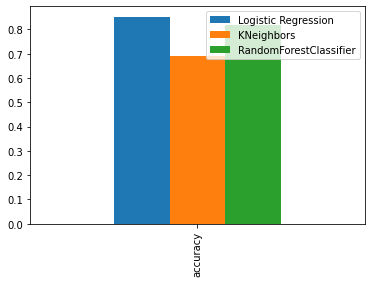

In [0]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot(kind='bar',)

# Hyperparameter Tuning (Manual)

In [0]:
#Tune KNN

neighbours = range(1,21)

train_score = []
test_score = []
knn = KNeighborsClassifier()


for i in neighbours:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train, y_train)

  train_score.append(knn.score(X_train,y_train))
  test_score.append(knn.score(X_test, y_test))



0.7377049180327869


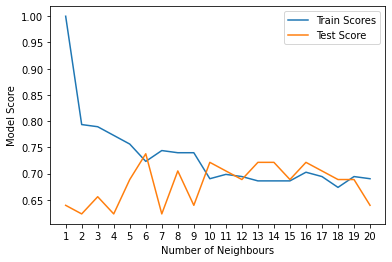

In [0]:
plt.plot(neighbours, train_score, label='Train Scores')
plt.plot(neighbours, test_score, label='Test Score')
plt.xticks(np.arange(1,21));
plt.xlabel('Number of Neighbours')
plt.ylabel('Model Score')
plt.legend()

print(max(test_score))

In [0]:
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_leaf': np.arange(1, 20, 2),
           'min_samples_split': np.arange(2, 20 , 2)}

In [0]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                n_iter=20,
                                cv=5,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [0]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [0]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
rs_rf.score(X_test, y_test)

0.8524590163934426